# LAB - 9
121CS1133

## 1) k-Means on a randomly generated dataset

* Keep 6000 random points \\
* The number of centers to generate should be initially 4 \\
* The standard deviation of the clusters should be 0.9 \\

a) Display the scatter plot of the randomly generated data.

b) Initialize the KMeans model and display the plot after k-means clustering.

c) Try to cluster the above random dataset into 3 clusters. and display the plot after clustering.


Ques-  What is the optimal number of clusters? Use appropriate method/methods to find optimal number of clusters.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_points, num_clusters, std_dev):
    np.random.seed(42)  
    centers = np.random.rand(num_clusters, 2) * 10  
    data = []

    for center in centers:
        points = np.random.normal(loc=center, scale=std_dev, size=(num_points // num_clusters, 2))
        data.append(points)

    return np.vstack(data), centers

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def k_means(data, k, max_iters=100):
    np.random.seed(42)
    initial_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[initial_indices]
    
    for _ in range(max_iters):
        labels = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)
        
        new_centroids = np.zeros((k, data.shape[1]))
        for i in range(k):
            points = data[labels == i]
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

def plot_clusters(data, labels, centroids, title):
    plt.figure(figsize=(10, 6))
    for i in np.unique(labels):
        plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

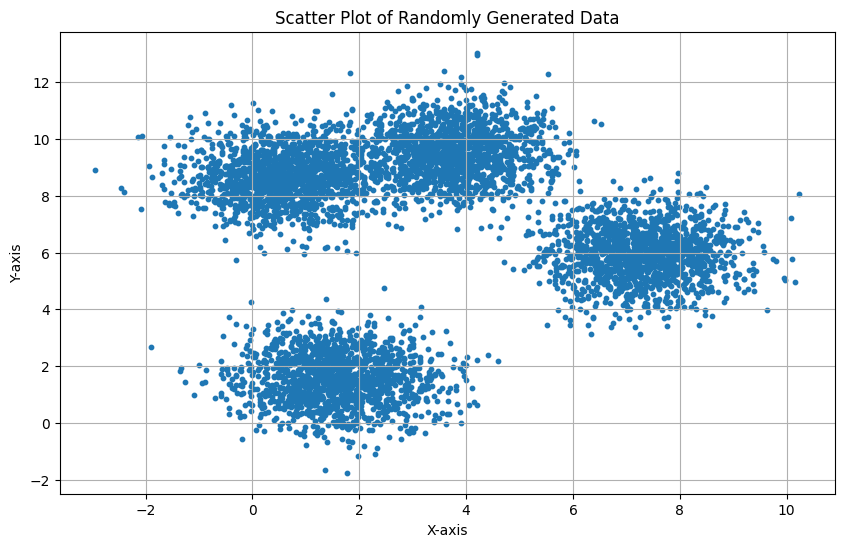

In [14]:
# 1.a)
num_points = 6000
num_initial_clusters = 4
std_dev = 0.9
data, centers = generate_data(num_points, num_initial_clusters, std_dev)

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.title("Scatter Plot of Randomly Generated Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

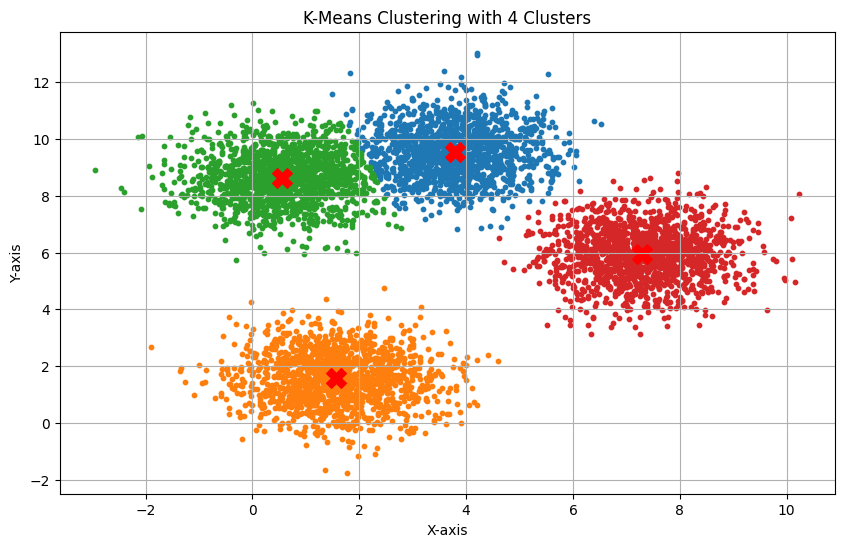

In [13]:
# 1.b)
labels_initial, centroids_initial = k_means(data, num_initial_clusters)
plot_clusters(data, labels_initial, centroids_initial, f'K-Means Clustering with {num_initial_clusters} Clusters')

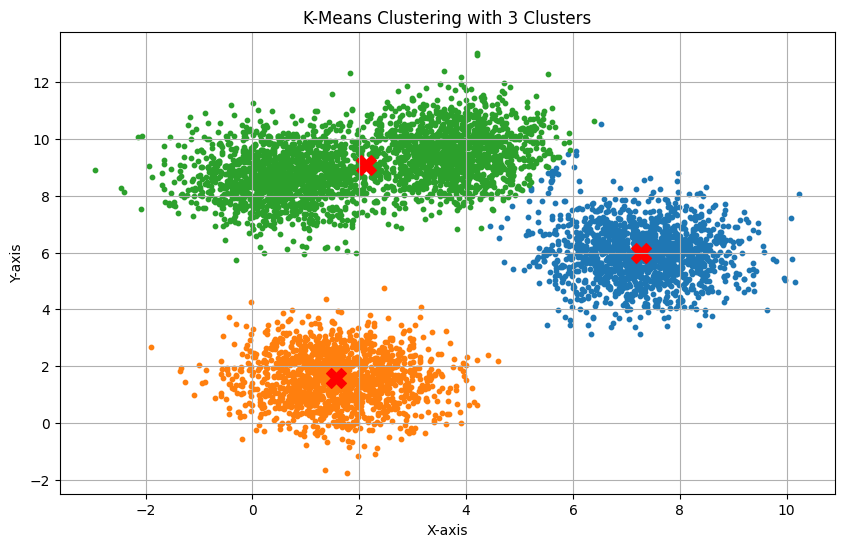

In [15]:
#1.c)
labels_three, centroids_three = k_means(data, 3)
plot_clusters(data, labels_three, centroids_three, 'K-Means Clustering with 3 Clusters')

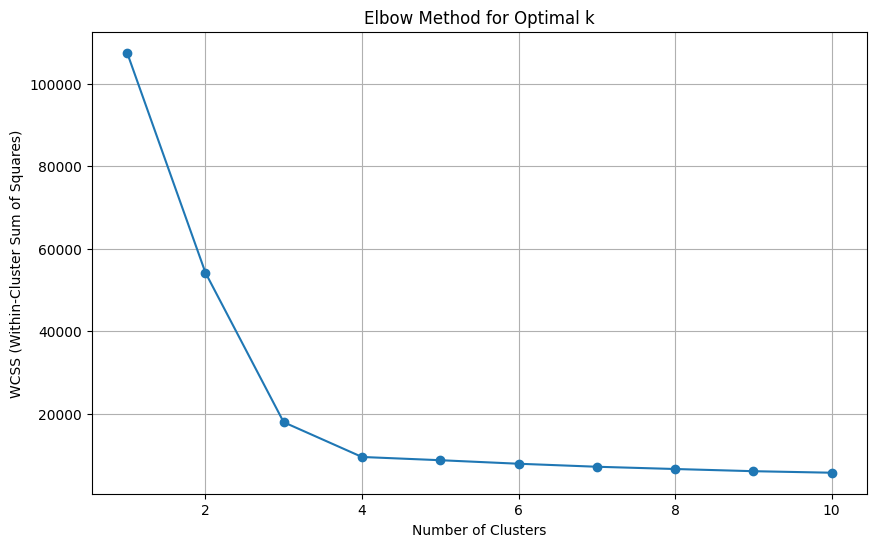

The optimal number of clusters is: 5


In [16]:
# Question (Elbow method)
wcss = []
for k in range(1, 11):
    labels, centroids = k_means(data, k)
    wcss.append(sum([euclidean_distance(data[i], centroids[int(labels[i])]) ** 2 for i in range(data.shape[0])]))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

optimal_clusters = np.argmin(np.diff(np.diff(wcss))) + 2  
print(f"The optimal number of clusters is: {optimal_clusters}")

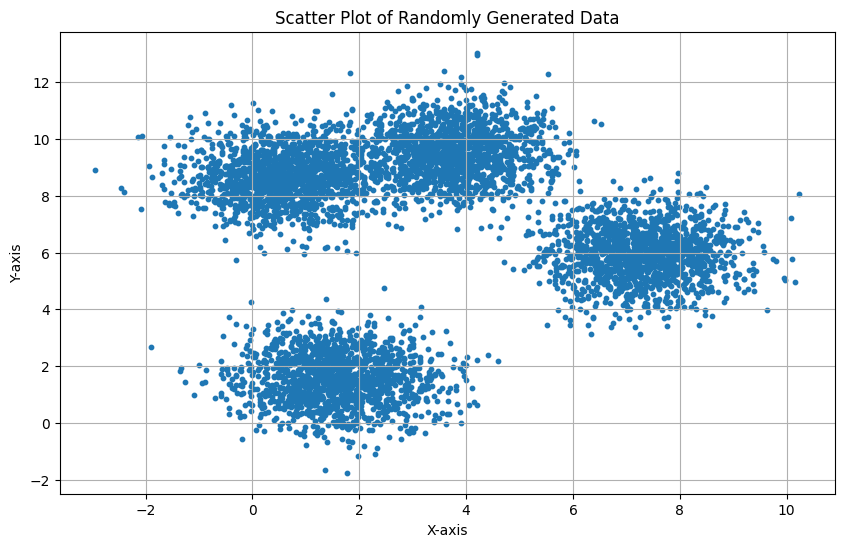

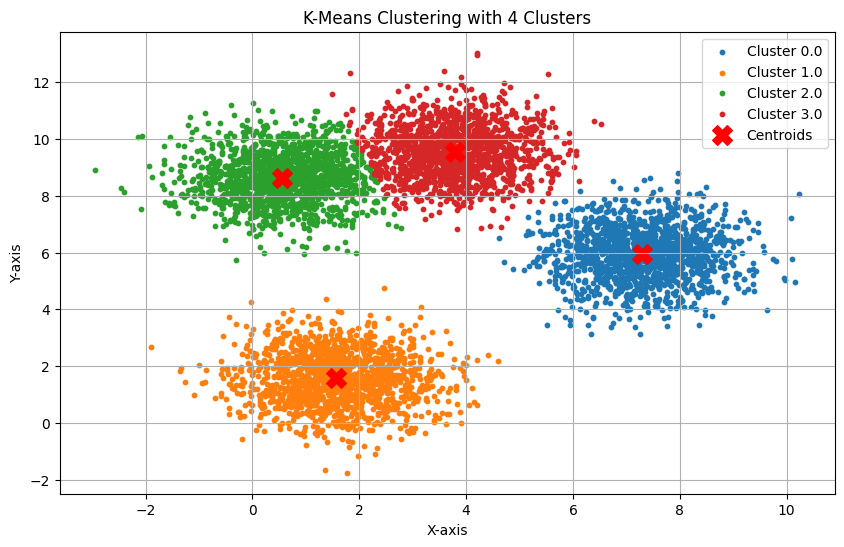

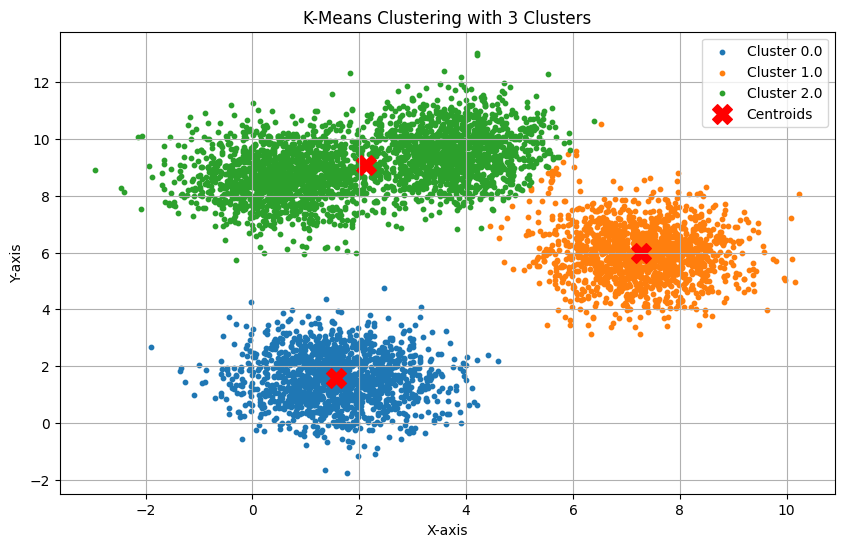

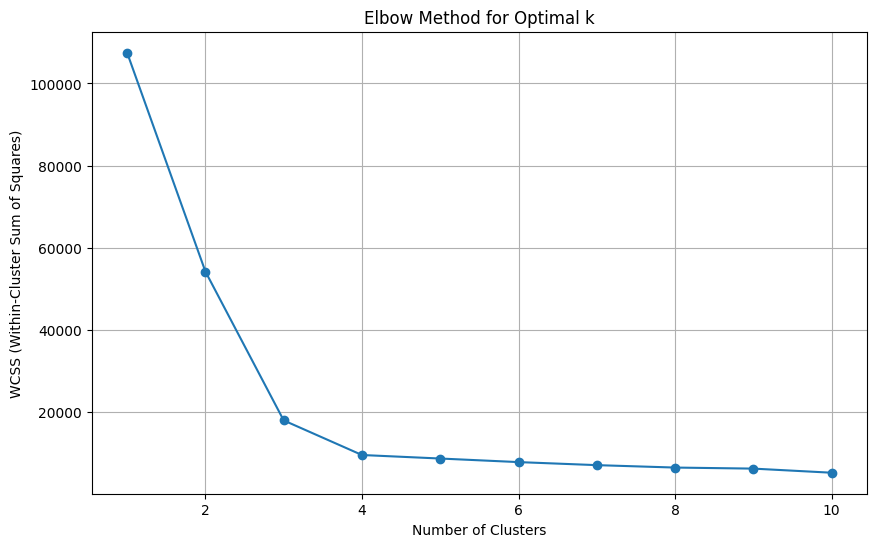

The optimal number of clusters is: 9


In [37]:
# k-means++

import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_points, num_clusters, std_dev):
    np.random.seed(42)  
    centers = np.random.rand(num_clusters, 2) * 10  
    data = []

    for center in centers:
        points = np.random.normal(loc=center, scale=std_dev, size=(num_points // num_clusters, 2))
        data.append(points)

    return np.vstack(data), centers

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# k-means++ initialization
def initialize_centroids(X, k):
    centroids = np.zeros((k, X.shape[1]))
    centroids[0] = X[np.random.choice(X.shape[0])]
    
    for i in range(1, k):
        distances = np.array([min([euclidean_distance(x, c) for c in centroids[:i]]) for x in X])
        probabilities = distances / distances.sum()
        centroids[i] = X[np.random.choice(X.shape[0], p=probabilities)]
    
    return centroids

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        labels = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = [euclidean_distance(X[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)
        
        new_centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            points = X[labels == i]
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

def plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(10, 6))
    for i in np.unique(labels):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], s=10, label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# a) 
num_points = 6000
num_initial_clusters = 4
std_dev = 0.9
data, centers = generate_data(num_points, num_initial_clusters, std_dev)

# Display the scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.title("Scatter Plot of Randomly Generated Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# b) 
labels_initial, centroids_initial = k_means(data, num_initial_clusters)
plot_clusters(data, labels_initial, centroids_initial, f'K-Means Clustering with {num_initial_clusters} Clusters')

# c)
labels_three, centroids_three = k_means(data, 3)
plot_clusters(data, labels_three, centroids_three, 'K-Means Clustering with 3 Clusters')

# Determine the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    labels, centroids = k_means(data, k)
    wcss.append(sum([euclidean_distance(data[i], centroids[int(labels[i])]) ** 2 for i in range(data.shape[0])]))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Optimal number of clusters based on the elbow method
optimal_clusters = np.argmin(np.diff(np.diff(wcss))) + 2  
print(f"The optimal number of clusters is: {optimal_clusters}")


## 2) k-Means on country-continent dataset

a) Read the dataset from the CSV file.

b) Get the unique continents from the dataset.

c) Map text data to numbers.

d) Run the k-means algorithm with the number of continents clusters.

e) Plot the results.

Ques- Compare the results with different number of clusters. What do you observe?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# a) Read the dataset 
file_path = 'countries_continents.csv'  
data = pd.read_csv(file_path)

In [ ]:
# b) Get unique continents 
unique_continents = data['Continent'].unique()
print("Unique Continents:", unique_continents)

Unique Continents: ['North America' 'Asia' 'Africa' 'Europe' 'South America' 'Oceania'
 'Antarctica' 'Seven seas (open ocean)']


In [ ]:
# c) Map text to numbers
continent_mapping = {continent: idx for idx, continent in enumerate(unique_continents)}
print("Continent Mapping:", continent_mapping)

continent_numbers = []
for continent in data['Continent']:
    continent_numbers.append(continent_mapping[continent])

data['Continent_Num'] = continent_numbers
print(data.head())

Continent Mapping: {'North America': 0, 'Asia': 1, 'Africa': 2, 'Europe': 3, 'South America': 4, 'Oceania': 5, 'Antarctica': 6, 'Seven seas (open ocean)': 7}
       Country  Longitude   Latitude      Continent  Continent_Num
0        Aruba -69.982677  12.520880  North America              0
1  Afghanistan  66.004734  33.835231           Asia              1
2       Angola  17.537368 -12.293361         Africa              2
3     Anguilla -63.064989  18.223959  North America              0
4      Albania  20.049834  41.142450         Europe              3


In [ ]:
# d) k-means algorithm
X = data[['Longitude', 'Latitude']].values

def k_means(X, k, max_iters=100):
    np.random.seed(42)  
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

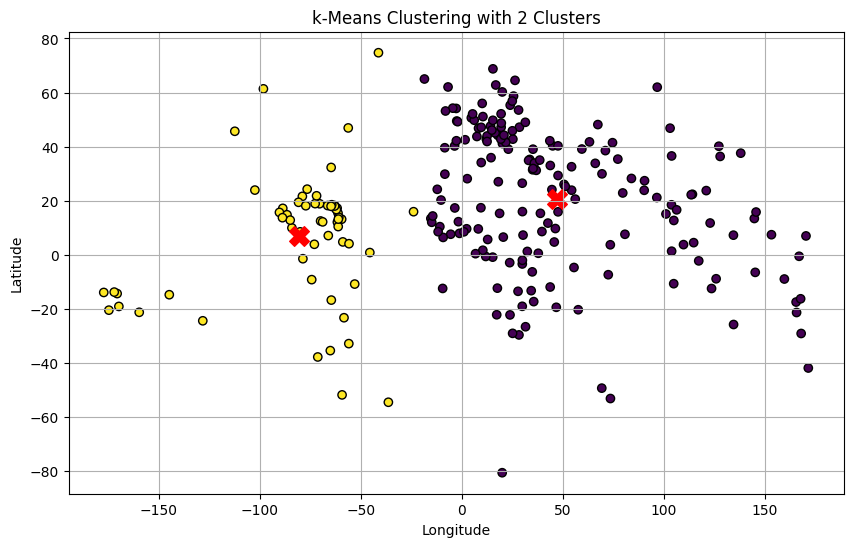

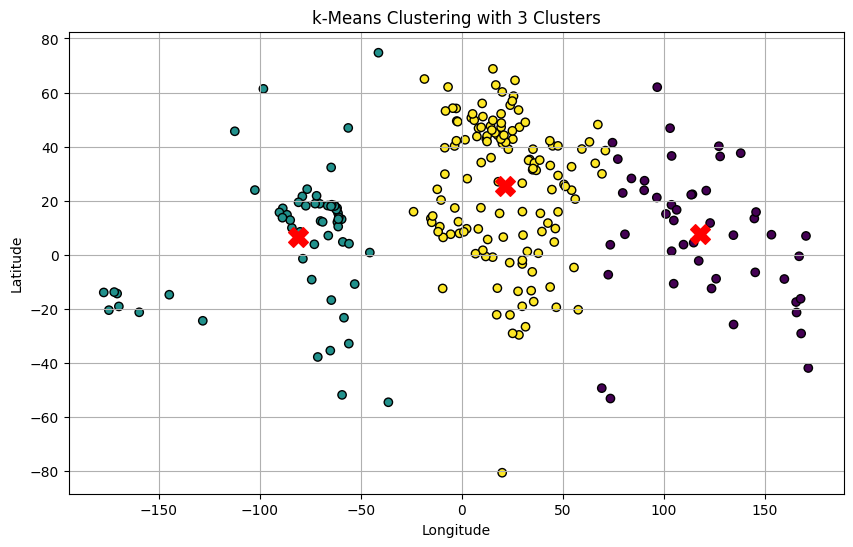

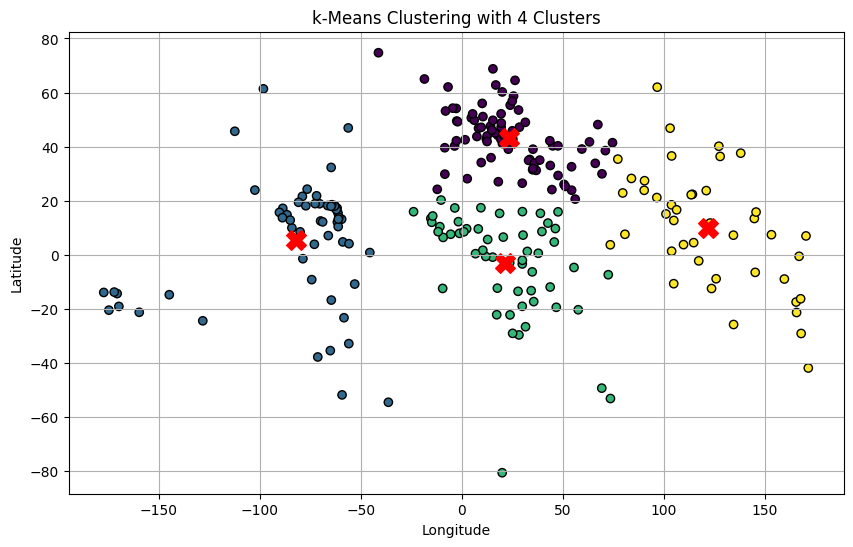

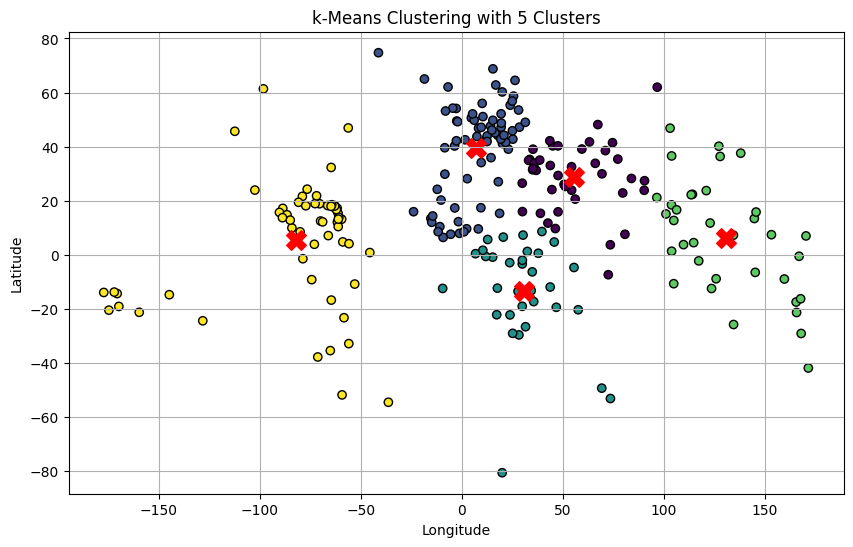

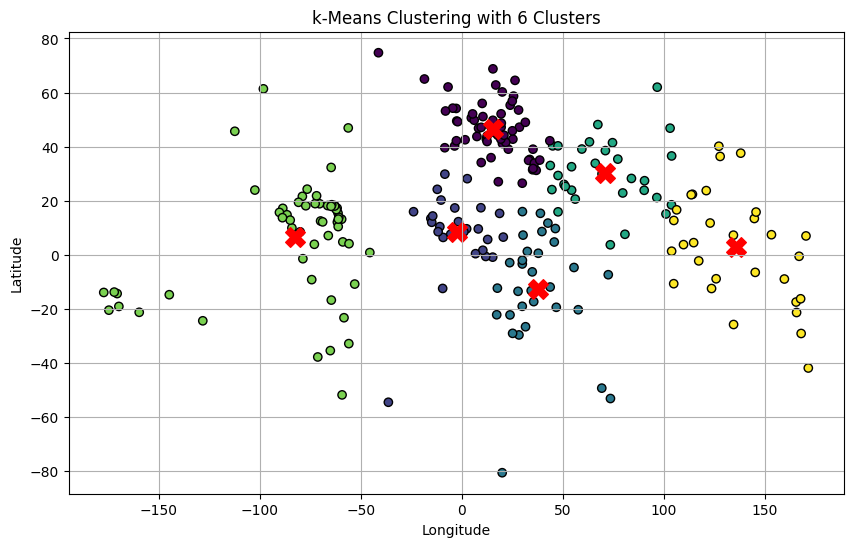

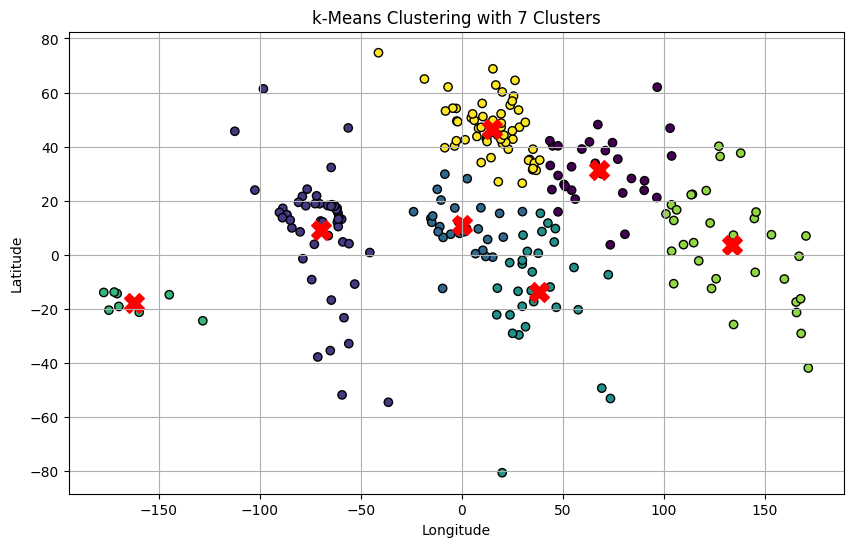

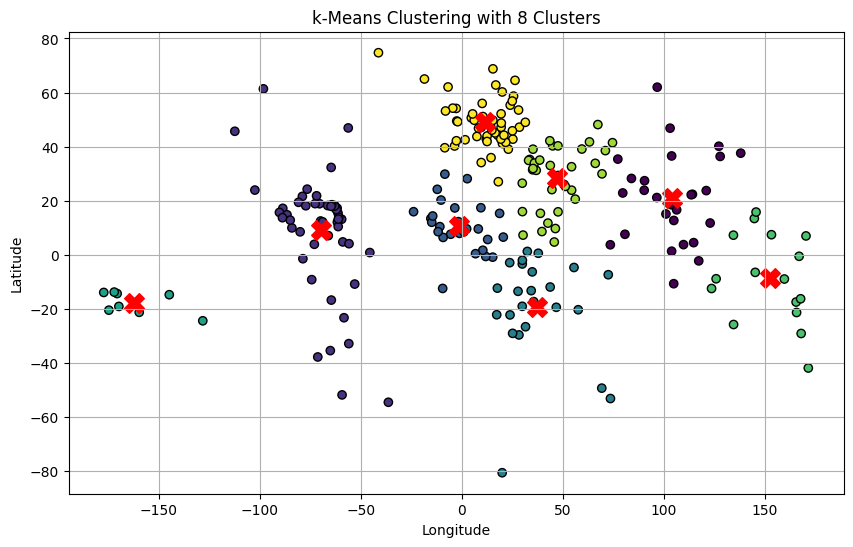

In [35]:
# e) Plotting 
def plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

for k in range(2, len(unique_continents) + 1):
    labels, centroids = k_means(X, k)
    plot_clusters(X, labels, centroids, f'k-Means Clustering with {k} Clusters')

# e)
Observations:
1. With fewer clusters (k=2 to k=3), continents are grouped closer together.
2. As the number of clusters increases (k=4 to k=6), distinct continents are better separated.
3. At higher cluster counts (k=7 to k=8), clusters align closely with actual continents.
4. The 'Seven seas (open ocean)' is treated as a distinct cluster, indicating its geographical separation.